# Importing Basic Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
# removing the unnamed: 0 col

df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# checking for duplicated rows

df.duplicated().sum()

29

In [7]:
#df.drop_duplicates(inplace=True)

In [8]:
#df.shape

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [10]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns



In [11]:
catvars

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [12]:
numvars

Index(['Inches', 'Price'], dtype='object')

In [13]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
    
for col in catvars:
    uniquevals(col)
    valuecounts(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Valuecounts of the particular col Company is : Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Valuecounts of the particular col TypeName is : Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook             

In [14]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [15]:
'''
so on observation we can see that if we remove "GB" from RAM,i can 
make it as an integer value then after,now same goes with Memory as 
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown below
'''

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column

df['Ram'] = df['Ram'].astype('int32')

# converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

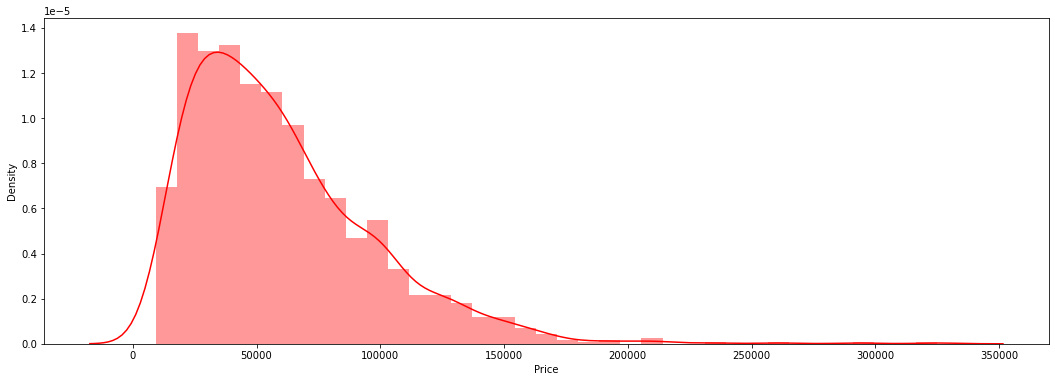

In [17]:
# viewing the distribution of the price column

plt1 = plt.figure(figsize = (18,6))
sn.distplot(df['Price'],color='red')
plt.show()

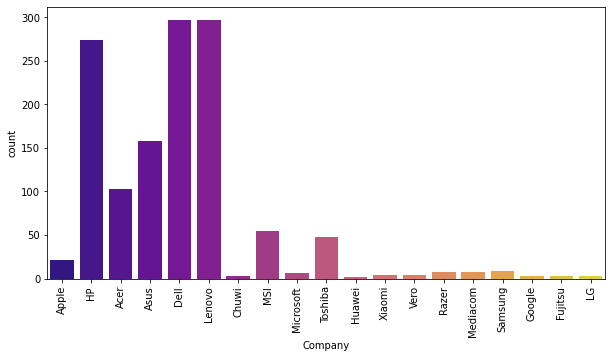

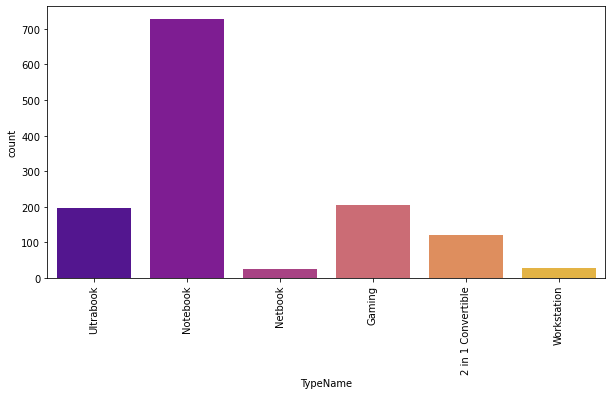

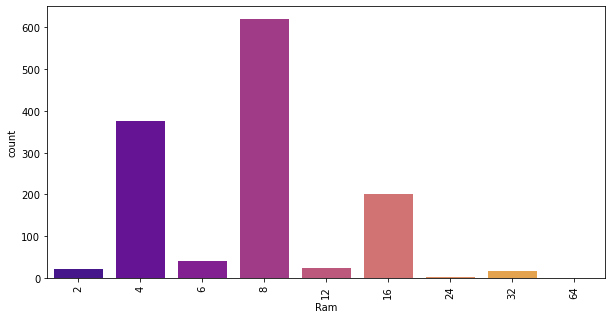

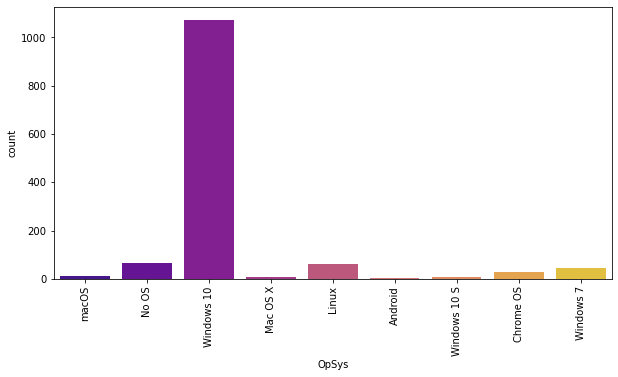

In [18]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(10,5))
    sn.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

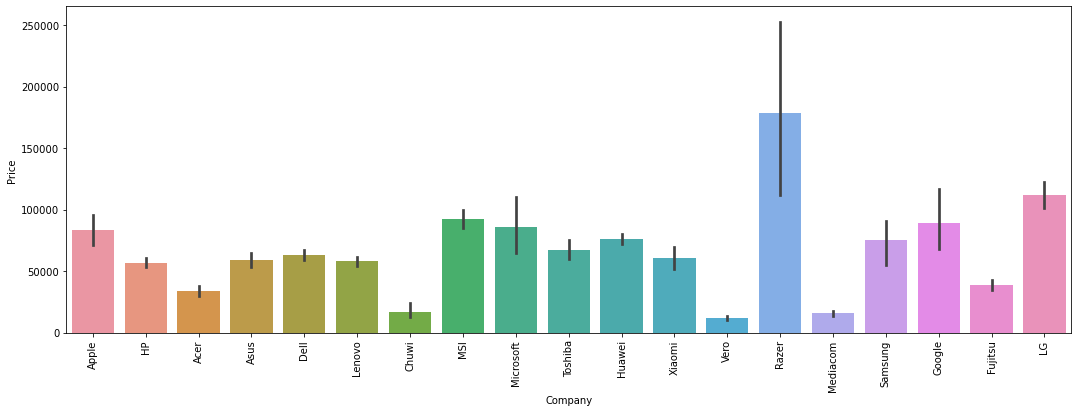

In [19]:
# average price for each of the laptop brands

plt.figure(figsize=(18,6))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

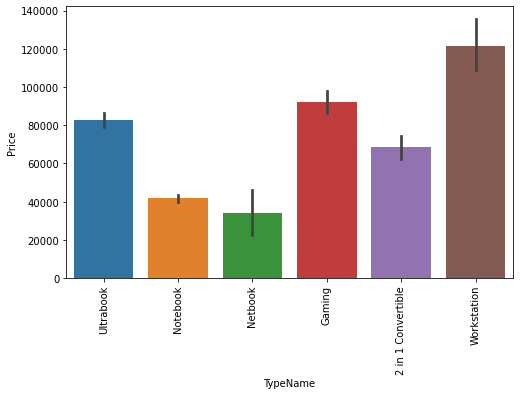

In [20]:
# average price for laptop type

plt.figure(figsize=(8,5))
sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

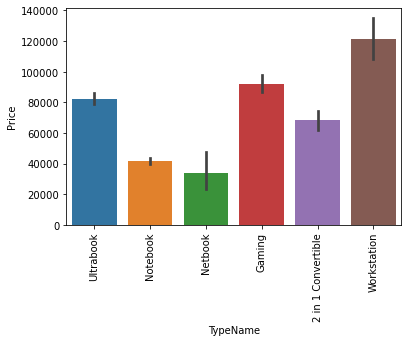

In [21]:
# laptop type and variation about the price 

sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

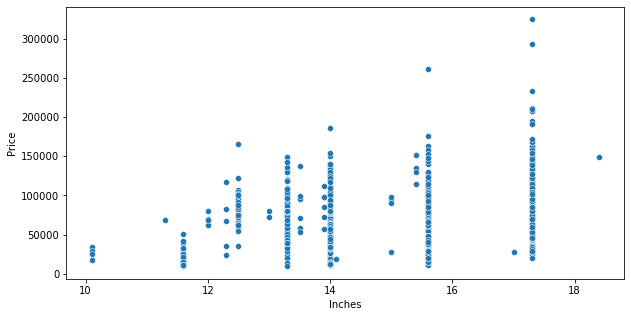

In [22]:
# variation of inches towards the price
plt1 = plt.figure(figsize = (10,5))
sn.scatterplot(x = df['Inches'],y = df['Price'])
plt.show()

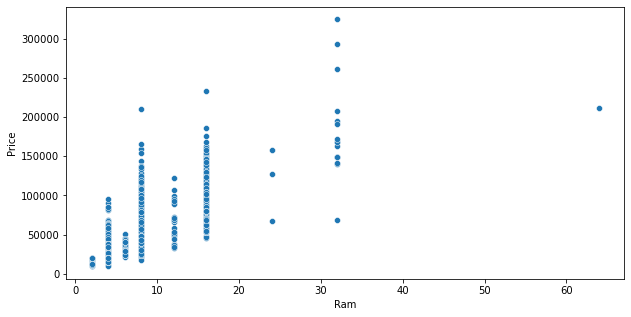

In [23]:
# variation of ram towards price

plt1 = plt.figure(figsize = (10,5))
sn.scatterplot(x = df['Ram'],y = df['Price'])
plt.show()

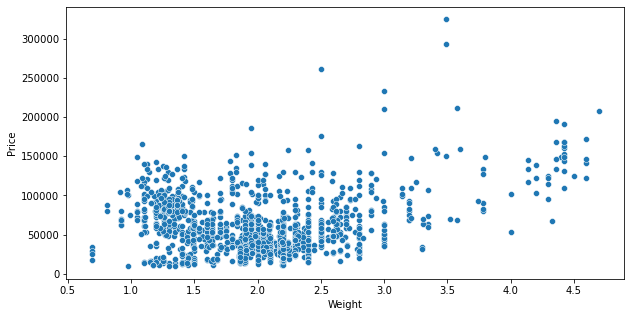

In [24]:
# variation of weight towards price

plt1 = plt.figure(figsize = (10,5))
sn.scatterplot(x = df['Weight'],y = df['Price'])
plt.show()

In [25]:
## For the `Screen Resolution` column we have many types of Screen Resolutions out there 

In [26]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [27]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
448,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.20,54757.9872,0
340,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,14646.6720,0
925,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.95,38889.0720,0
449,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,137941.9200,1
621,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,78055.2000,0


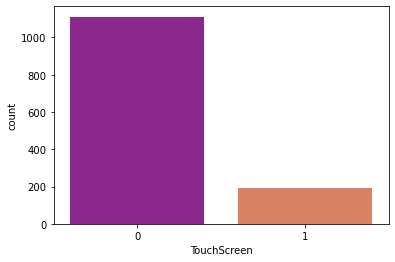

In [28]:
sn.countplot(df['TouchScreen'],palette='plasma')
plt.show()

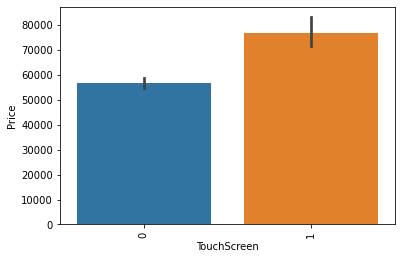

In [29]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [30]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1236,HP,Ultrabook,14.0,2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,117119.5632,0,0
39,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.10,46833.1200,0,0
724,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,0,0
988,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,39906.7200,0,0
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.0000,0,1


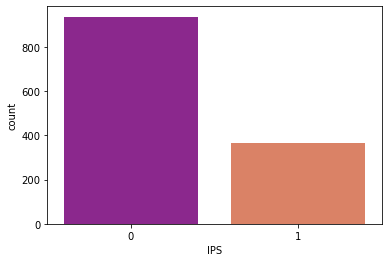

In [31]:
# IPS count

sn.countplot(df['IPS'],palette='plasma')
plt.show()

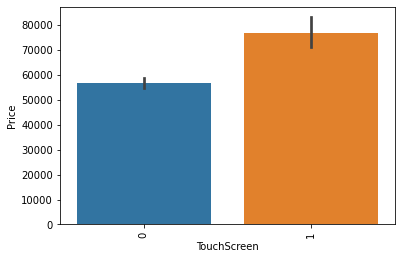

In [32]:
# price variation with respect to the IPS col

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

### Extracting the X Resolution and the Y Resolution

In [33]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [34]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [35]:
'''
So basically from that whole text of the X_res col,we need to 
extract the digits from it
'''

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


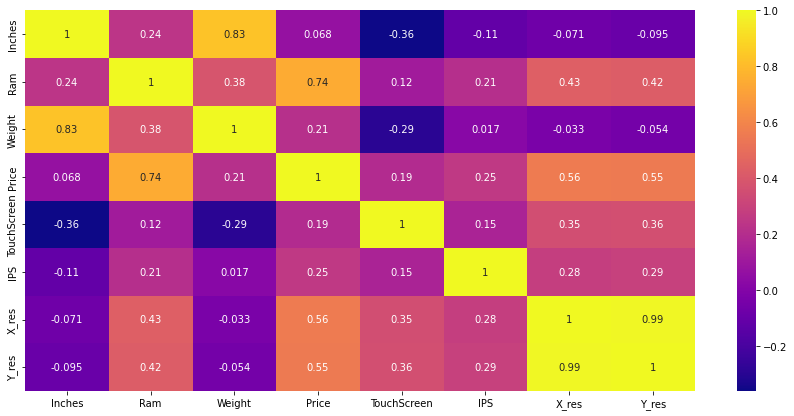

In [37]:
# checking corelation between features 

plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [38]:
# we will use VIF method to handle multicolinearity present in independant features

from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Price') ):#only num cols except for the price column
        col_list.append(col)

In [39]:
col_list

['Inches', 'Ram', 'Weight', 'TouchScreen', 'IPS', 'X_res', 'Y_res']

In [40]:
X = df[col_list]
X

,Inches,Ram,Weight,TouchScreen,IPS,X_res,Y_res
0,13.3,8,1.37,0,1,2560,1600
1,13.3,8,1.34,0,0,1440,900
2,15.6,8,1.86,0,0,1920,1080
3,15.4,16,1.83,0,1,2880,1800
4,13.3,8,1.37,0,1,2560,1600
...,...,...,...,...,...,...,...
1298,14.0,4,1.80,1,1,1920,1080
1299,13.3,16,1.30,1,1,3200,1800
1300,14.0,2,1.50,0,0,1366,768
1301,15.6,6,2.19,0,0,1366,768


In [41]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6


In [42]:
# checking VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

       feature          VIF
0       Inches    44.175892
1          Ram     5.858670
2       Weight    24.478255
3  TouchScreen     1.496154
4          IPS     1.563501
5        X_res  1426.809565
6        Y_res  1379.935443


In [43]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [44]:
#From the correlation plot we observed that as the X_res and Y_res is increasing,
#the price of the laptop is also increasing,
#so `X_res and Y_res` are positively correlated and they are giving much information,
#so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively

In [45]:
# creating new PPI column using X_res and Y_res 

df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [46]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [47]:
##So as we observe from the correlation data that the `PPI` is having good correlation,
#so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,
#so we will drop `Inches,X_res,Y_res` as well

In [48]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

       feature       VIF
0          Ram  5.219624
1       Weight  6.831896
2  TouchScreen  1.540619
3          IPS  1.532252
4          PPI  7.381091


In [50]:
#Now we will work on `CPU` column,as that also has much text data 
#and we need to process it efficiently as we may get good insights from them

In [51]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [52]:
''' Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole

So if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown below '''

" Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole\n\nSo if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown below "

In [53]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [54]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


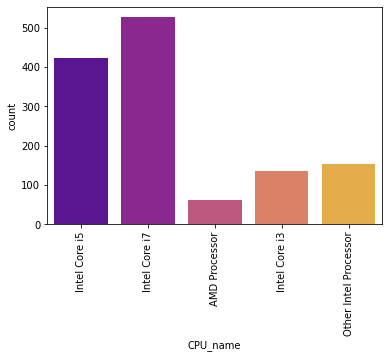

In [55]:
sn.countplot(df['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

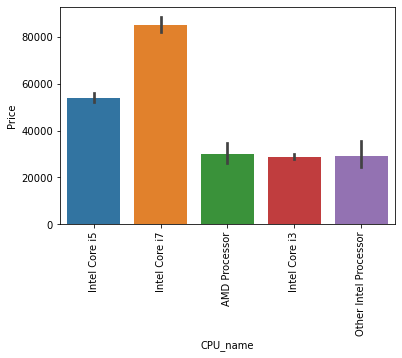

In [56]:
# price vs processor variation

sn.barplot(df['CPU_name'],df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [57]:
## dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


##### Analysis on the RAM column

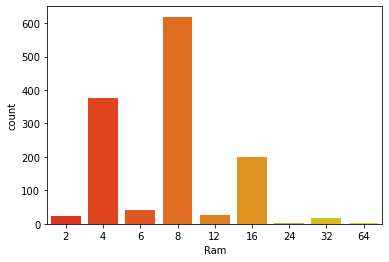

In [58]:
sn.countplot(df['Ram'],palette='autumn')
plt.show()

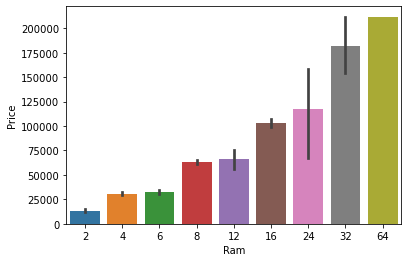

In [59]:
## ram is having good relation with price

sn.barplot(df['Ram'],df['Price'])
plt.show()

##### About the memory column

We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part

This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown

In [60]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [61]:
# we have different categories and also different kinds of variations 

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [62]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [63]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [64]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [65]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [66]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [67]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    

# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [68]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [69]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [70]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
1209,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.20,130482.7200,0,0,141.211998,Intel Core i7,1000,256,0,0
622,Dell,Notebook,4,1000 HDD,AMD Radeon 530,Windows 10,2.20,41345.2800,0,0,141.211998,Intel Core i5,1000,0,0,0
971,Dell,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.50,104587.5744,1,0,209.800683,Intel Core i7,0,256,0,0
135,HP,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.63,52640.6400,0,0,157.350512,Intel Core i7,0,256,0,0
863,Lenovo,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,No OS,2.50,54185.7600,0,1,141.211998,Intel Core i5,1000,0,0,0


In [71]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
274,Toshiba,Notebook,8,Nvidia GeForce 930M,Windows 10,2.20,43263.3600,0,0,100.454670,Intel Core i7,500,0,0,0
486,Dell,Workstation,16,Nvidia Quadro M620,Windows 10,2.17,124568.6400,0,1,141.211998,Intel Core i7,0,512,0,0
1155,HP,Notebook,4,AMD Radeon 520,Windows 10,1.91,25515.2592,0,0,141.211998,AMD Processor,0,256,0,0
307,Toshiba,Notebook,8,Nvidia GeForce 930M,Windows 10,2.20,55571.0400,0,1,141.211998,Intel Core i7,0,256,0,0
54,Acer,Notebook,4,Intel HD Graphics 620,Windows 10,2.40,20459.5200,0,0,100.454670,Intel Core i3,1000,0,0,0


In [72]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well

In [73]:
df.columns


Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [74]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


##### Analysis on GPU

In [75]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

**Here as we are having less data regarding the laptops,its better that we focus on `GPU brands` instead focusing on the values which are present there beside them,we will focus on the `brands`**

In [76]:
# this is what we will be doing,extracting the brands 
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


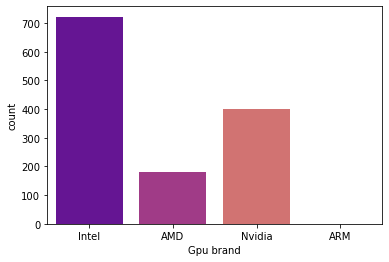

In [77]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(df['Gpu brand'],palette='plasma')
plt.show()

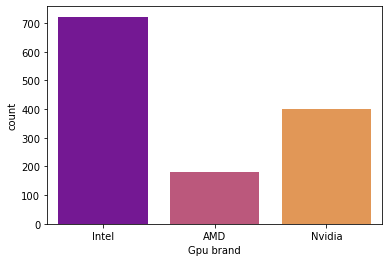

In [78]:
# removing the "ARM" tuple

df = df[df['Gpu brand']!='ARM']
sn.countplot(df['Gpu brand'],palette='plasma')
plt.show()

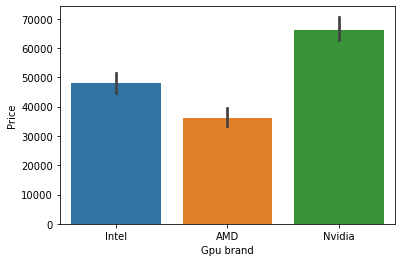

In [79]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sn.barplot(df['Gpu brand'],df['Price'],estimator=np.median)
plt.show()

In [80]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


##### Operating System analysis

In [81]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

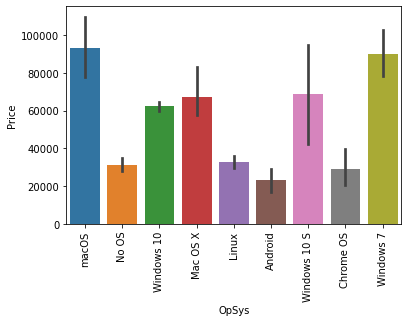

In [82]:
sn.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [83]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [84]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
929,HP,Notebook,4,Windows,1.95,61218.7200,0,0,111.935204,Intel Core i5,500,0,Intel
57,Asus,Notebook,4,Windows,2.00,31232.2032,0,0,100.454670,Intel Core i5,0,256,Intel
140,Acer,Notebook,4,Windows,3.00,34898.4000,0,1,127.335675,Intel Core i3,1000,0,Nvidia
763,Asus,Ultrabook,8,Windows,1.20,60153.1200,0,1,276.053530,Intel Core i5,0,256,Intel
270,Apple,Ultrabook,8,Mac,1.37,104370.1920,0,1,226.983005,Intel Core i5,0,512,Intel


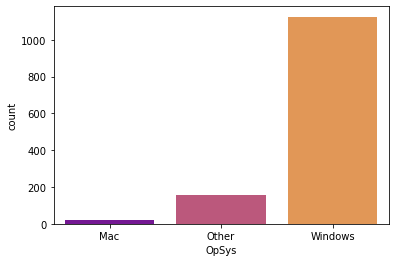

In [85]:
sn.countplot(df['OpSys'],palette='plasma')
plt.show()

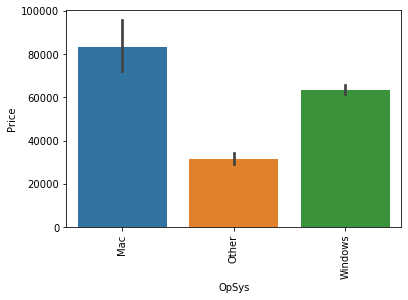

In [86]:
#comparison of opsys with price

sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

###### Weight analysis 

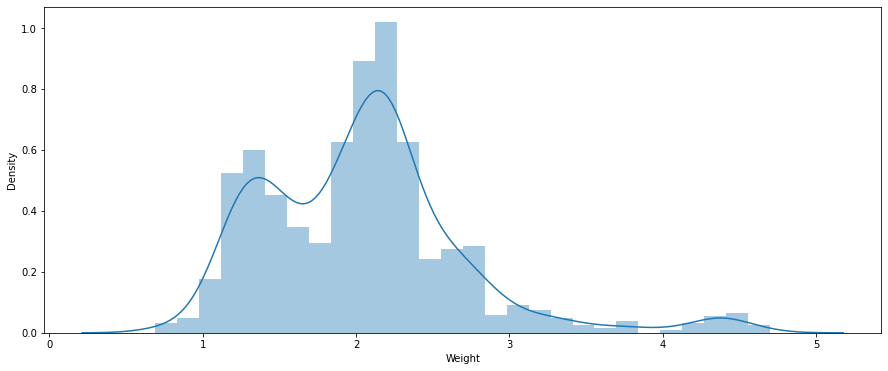

In [87]:
plt1 = plt.figure(figsize = (15,6))
sn.distplot(df['Weight'])
plt.show()

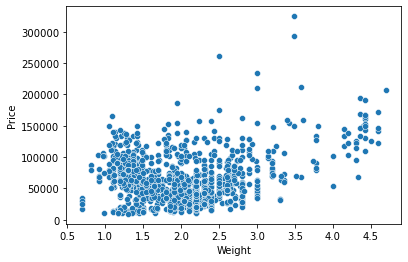

In [88]:
sn.scatterplot(df['Weight'],df['Price'])
plt.show()

##### Price Analysis

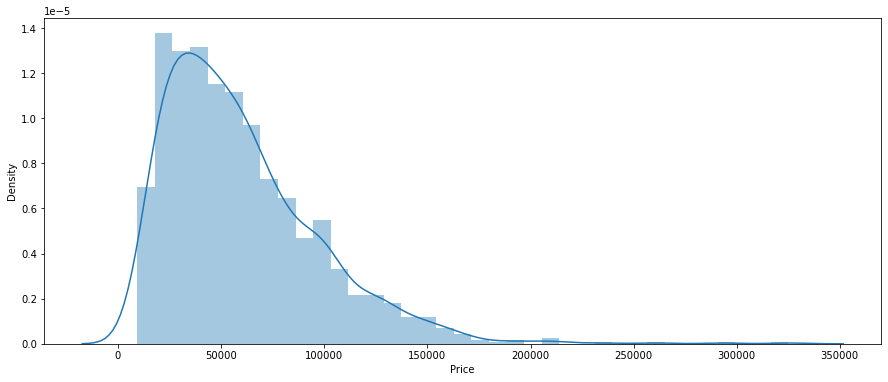

In [89]:
plt1 = plt.figure(figsize = (15,6))
sn.distplot(df['Price'])
plt.show()

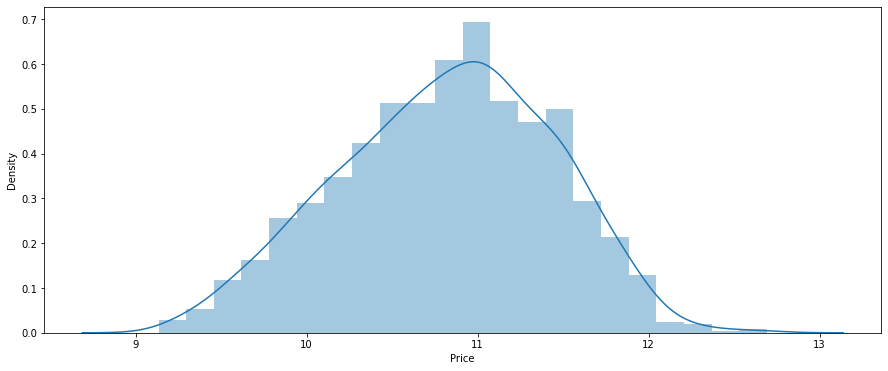

In [90]:
# so if we apply np.log to the Price col we get a gaussian distibution

plt1 = plt.figure(figsize = (15,6))
sn.distplot(np.log(df['Price']))
plt.show()

In [91]:
## correlation with price

df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

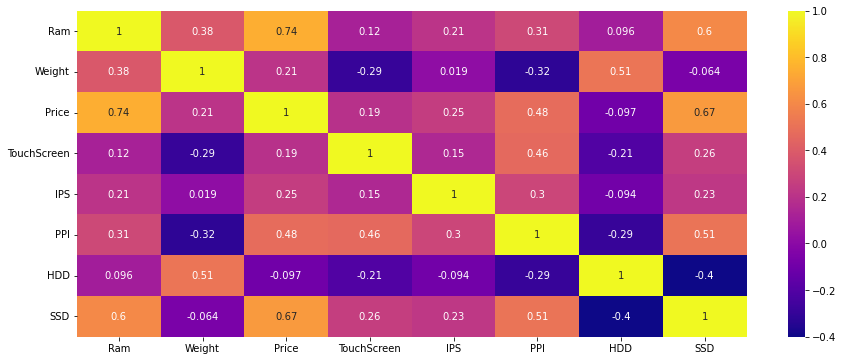

In [92]:
plt.figure(figsize=(15,6))
sn.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'Price') ):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

       feature        VIF
0          Ram   8.738172
1       Weight  10.046872
2  TouchScreen   1.536186
3          IPS   1.536721
4          PPI   8.506660
5          HDD   2.914293
6          SSD   5.075918


## Model Building

In [94]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [96]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables

In [97]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

### Linear Regression

In [98]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418626
MAE 0.21017827976428774


In [99]:
## now mae is 0.21 so if you want to check how much difference is there do this

## we see there is a difference of 1.23 only as per the orignal value
## that is our model predicts +-0.21 more/less than the original price!

np.exp(0.21)

1.2336780599567432

### Ridge Regression

In [100]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8094565443299055
MAE 0.20962006703278943


### LassoRegression

In [101]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.5043384149461752
MAE 0.3464823673003957


### Decision Tree

In [102]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8078258757878698
MAE 0.1978668857366595


### Random Forest

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8843794347162912
MAE 0.15629431255341938


In [104]:
#from sklearn.externals import joblib
import joblib

joblib.dump(pipe,'pipe_joblib')
joblib.dump(df,'df_joblib')

['df_joblib']

In [105]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [106]:
train.to_csv('traineddata.csv',index=None)

### Adaboost

In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = AdaBoostRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.801645722443171
MAE 0.22567108674550407


### Gradient boost

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8665602907076121
MAE 0.17566453851342986


### XgbRegressor

In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = XGBRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8749933027421432
MAE 0.16295282536568362


### SVM 

In [110]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = SVR()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6110751844196859
MAE 0.29589619896781816


## Hyperparameter Tuning 

In [111]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

In [112]:
train_new = pd.get_dummies(train,columns=transformlist,drop_first=True)
train_new.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(train_new,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 38), (196, 38))

### random forest

In [114]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[100,150,200,250,300],
            'criterion':["squared_error", "absolute_error"],
            'max_depth':[2,4,8,10],
        }
    }
}

In [115]:
scores = []
for modelname,mp in params.items():
    clf = GridSearchCV(mp['model'],param_grid=mp['params'],verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END criterion=squared_error, max_depth=2, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=2, n_estimators=150; total time=   0.2s
[CV] END criterion=squared_error, max_depth=2, n_estimators=150; total time=   0.2s
[CV] END criterion=squared_error, max_depth=2, n_estimators=150; total time=   0.2s
[CV] END criterion=squared_error, max_depth=2, n_estimators=150; total time=   0.2s
[CV] END criterion=squared_error, max_depth=2, n_estimators=150; total time=   0.2s
[CV] END criterion=squared_error, max_depth=2, n_estimators=200; total time=   0.3s
[CV] END crite

[CV] END criterion=squared_error, max_depth=10, n_estimators=300; total time=   1.0s
[CV] END criterion=squared_error, max_depth=10, n_estimators=300; total time=   1.0s
[CV] END criterion=squared_error, max_depth=10, n_estimators=300; total time=   1.4s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=100; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=100; total time=   1.9s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=100; total time=   1.8s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=100; total time=   1.8s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=100; total time=   2.0s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=150; total time=   3.0s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=150; total time=   2.9s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=150; total time=   2.8s
[CV] END criterion=absolute_error, max_depth=2, n_estimators=150;

[CV] END criterion=absolute_error, max_depth=10, n_estimators=250; total time=  12.4s
[CV] END criterion=absolute_error, max_depth=10, n_estimators=300; total time=  15.0s
[CV] END criterion=absolute_error, max_depth=10, n_estimators=300; total time=  16.0s
[CV] END criterion=absolute_error, max_depth=10, n_estimators=300; total time=  15.5s
[CV] END criterion=absolute_error, max_depth=10, n_estimators=300; total time=  20.4s
[CV] END criterion=absolute_error, max_depth=10, n_estimators=300; total time=  15.5s


In [116]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8687100708848006,
  'best_estimator': RandomForestRegressor(criterion='absolute_error', max_depth=10,
                        n_estimators=300)}]

### Xgb regressor

In [117]:
params=  {
    
    'Xg boost':{
        'model':XGBRegressor(),
        'params':{
            'n_estimators':[100,150,200,250],
            'max_depth':[3,8,10],
            'learning_rate':[0.1, 1.0],
            'reg_alpha':[0.25,0.5,0.75,1.0],
            'reg_lambda':[0.25,0.5,0.75,1.0],
        }
    }
}

In [118]:
scores = []
for modelname,mp in params.items():
    clf = GridSearchCV(mp['model'],param_grid=mp['params'],verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })
    
scores

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.5; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimato

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1.0, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.25; total time=   0.1s
[CV] END lea

[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learn

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learni

[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=0.75, reg_lambda=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.5; total time=   0.2s
[CV] END lear

[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END 

[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=150, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] 

[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.5; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.5; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.75; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.75; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=0.75; total time=   0.3s
[CV] E

[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.5, reg_lambda=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.25; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.5; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.5; total time=   0.3s
[CV] E

[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.5, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV

[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=0.5; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=0.5; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=0.75; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] 

[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.5; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=0.75; total time=   0.3s
[CV] E

[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.25, reg_lambda=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.25, reg_lambda=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.25, reg_lambda=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.25, reg_lambda=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.25; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.25; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.25; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.25; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.25; total time=   0.4s
[

[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=1.0; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.25, reg_lambda=1.0; total time=   0.0s
[CV] E

[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.75; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=150, reg_alpha=0.25, reg_lambda=0.75; total time=   0.2s
[CV] 

[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=0.25, reg_lambda=0.5; total time=   0.1s
[CV] E

[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=200, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=0.25, reg_lambda=0.25; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=0.25, reg_lambda=0.5; total time=   0.2s
[CV] END

[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=3, n_estimators=250, reg_alpha=1.0, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=0.25, reg_lambda=0.25; total time=   0.1s
[CV] END learn

[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=100, reg_alpha=1.0, reg_lambda=1.0; total time=   0.0s
[CV] END learn

[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=150, reg_alpha=1.0, reg_lambda=0.75; total time=   0.1s
[CV] END learni

[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=0.75, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=1.0, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=200, reg_alpha=1.0, reg_lambda=0.5; total time=   0.2s
[CV] END lea

[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.75; total time=   0.3s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=0.75; total time=   0.4s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=1.0; total time=   0.3s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=1.0; total time=   0.3s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=1.0; total time=   0.3s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=1.0; total time=   0.3s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=0.75, reg_lambda=1.0; total time=   0.5s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=1.0, reg_lambda=0.25; total time=   0.3s
[CV] END learning_rate=1.0, max_depth=8, n_estimators=250, reg_alpha=1.0, reg_lambda=0.25; total time=   0.2s
[CV] END

[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.5; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.75; total time=   0.0s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=100, reg_alpha=0.75, reg_lambda=1.0; total time=   0

[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=150, reg_alpha=0.75, reg_lambda=0.75; total time=   0.

[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.5, reg_lambda=1.0; total time=   0.2s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.25; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=200, reg_alpha=0.75, reg_lambda=0.5; total time=   0.1s

[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=0.75; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=1.0; total time=   0.1s
[CV] END learning_rate=1.0, max_depth=10, n_estimators=250, reg_alpha=0.5, reg_lambda=1.0; total time=   0.1s
[CV] E

[{'model_name': 'Xg boost',
  'best_score': 0.8836985957484191,
  'best_estimator': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=250, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}]

In [119]:
scores

[{'model_name': 'Xg boost',
  'best_score': 0.8836985957484191,
  'best_estimator': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=250, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)}]

In [120]:
temp_df = pd.DataFrame(clf.cv_results_)

In [121]:
temp_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126247,0.007019,0.007915,0.001166,0.1,3,100,0.25,0.25,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.822485,0.884390,0.878647,0.850211,0.868801,0.860907,0.022446,229
1,0.130271,0.009577,0.007751,0.000710,0.1,3,100,0.25,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.826834,0.880033,0.879542,0.843470,0.867645,0.859505,0.021041,233
2,0.124998,0.005456,0.007721,0.000672,0.1,3,100,0.25,0.75,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.824690,0.878788,0.880167,0.837421,0.865282,0.857269,0.022392,240
3,0.122331,0.002469,0.007534,0.000560,0.1,3,100,0.25,1.0,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.825385,0.880320,0.876162,0.842418,0.865223,0.857902,0.020913,238
4,0.126073,0.007235,0.008142,0.001419,0.1,3,100,0.5,0.25,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.825886,0.884006,0.876963,0.852448,0.864591,0.860779,0.020508,230


In [122]:
temp_df [temp_df['rank_test_score'] ==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
126,0.403526,0.012278,0.008644,0.000205,0.1,8,250,1.0,0.75,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.841948,0.902627,0.893009,0.8825,0.89841,0.883699,0.021936,1


In [124]:
rf = RandomForestRegressor(criterion='absolute_error', max_depth=10, n_estimators=300)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print('R2 score',metrics.r2_score(y_test,ypred))
print('MAE',metrics.mean_absolute_error(y_test,ypred))

R2 score 0.8769857502353824
MAE 0.16422112147925896


## Prediction on the whole Dataset

In [125]:
predicted = []
testtrain = np.array(train_new)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

[array([11.14499883]),
 array([10.85895061]),
 array([10.64287025]),
 array([11.79235237]),
 array([11.31586028]),
 array([9.96378259]),
 array([11.54027242]),
 array([10.85895061]),
 array([11.46332753]),
 array([10.8620642]),
 array([10.09222425]),
 array([9.90533303]),
 array([11.75049608]),
 array([10.2251043]),
 array([11.21799522]),
 array([11.31586028]),
 array([10.83570312]),
 array([11.79235237]),
 array([10.34286727]),
 array([10.98429037]),
 array([9.47979882]),
 array([10.9167583]),
 array([9.68904058]),
 array([10.86179684]),
 array([10.93946173]),
 array([10.12418113]),
 array([10.91108947]),
 array([10.79622556]),
 array([11.09232351]),
 array([10.78626218]),
 array([9.58458428]),
 array([9.72296481]),
 array([10.17140783]),
 array([11.62652459]),
 array([10.91108947]),
 array([9.66455299]),
 array([9.96623083]),
 array([10.88167478]),
 array([10.31144124]),
 array([10.83508865]),
 array([10.01872129]),
 array([11.28759913]),
 array([10.35422941]),
 array([10.52685282]),

In [ ]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
df['Predicted Price'] = np.array(ans)
df

In [ ]:
# comparing result of actual and predicted using distribution plot

sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()